In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
#make the last 

files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.xlsx')

for f in files: 
    read_file = pd.read_excel (f, sheet_name='Sheet1')
    name = f[:-5]
    read_file.to_csv (name + ".csv", index = None, header=True)
    
#make the new files list the csv files much safer
files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.csv')
files

['../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SUMMER2022.csv',
 '../Dissertation_proj

In [3]:
#make function 
def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

df['OC/TN'] = (df['OC%']/12) / (df['TN%']/14) 

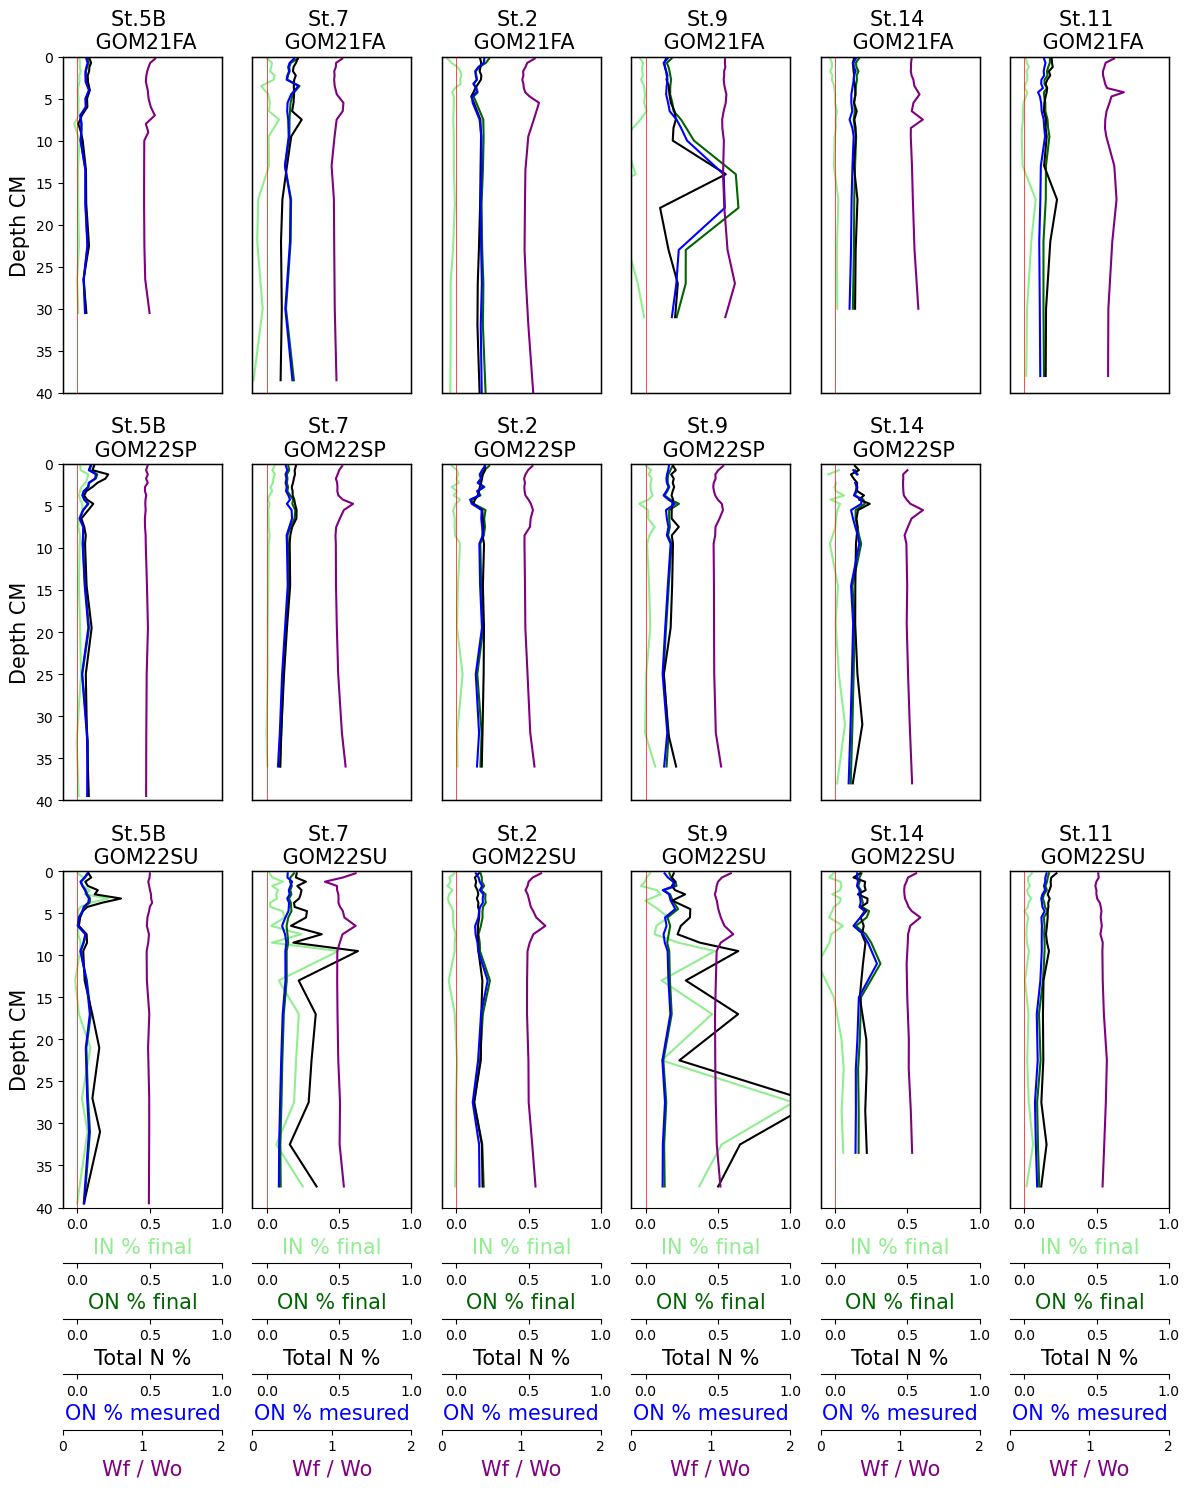

In [4]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IN%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,1)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['ON%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,1)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TN%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,1)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['ON%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,1)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('IN % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('ON % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total N %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('ON % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

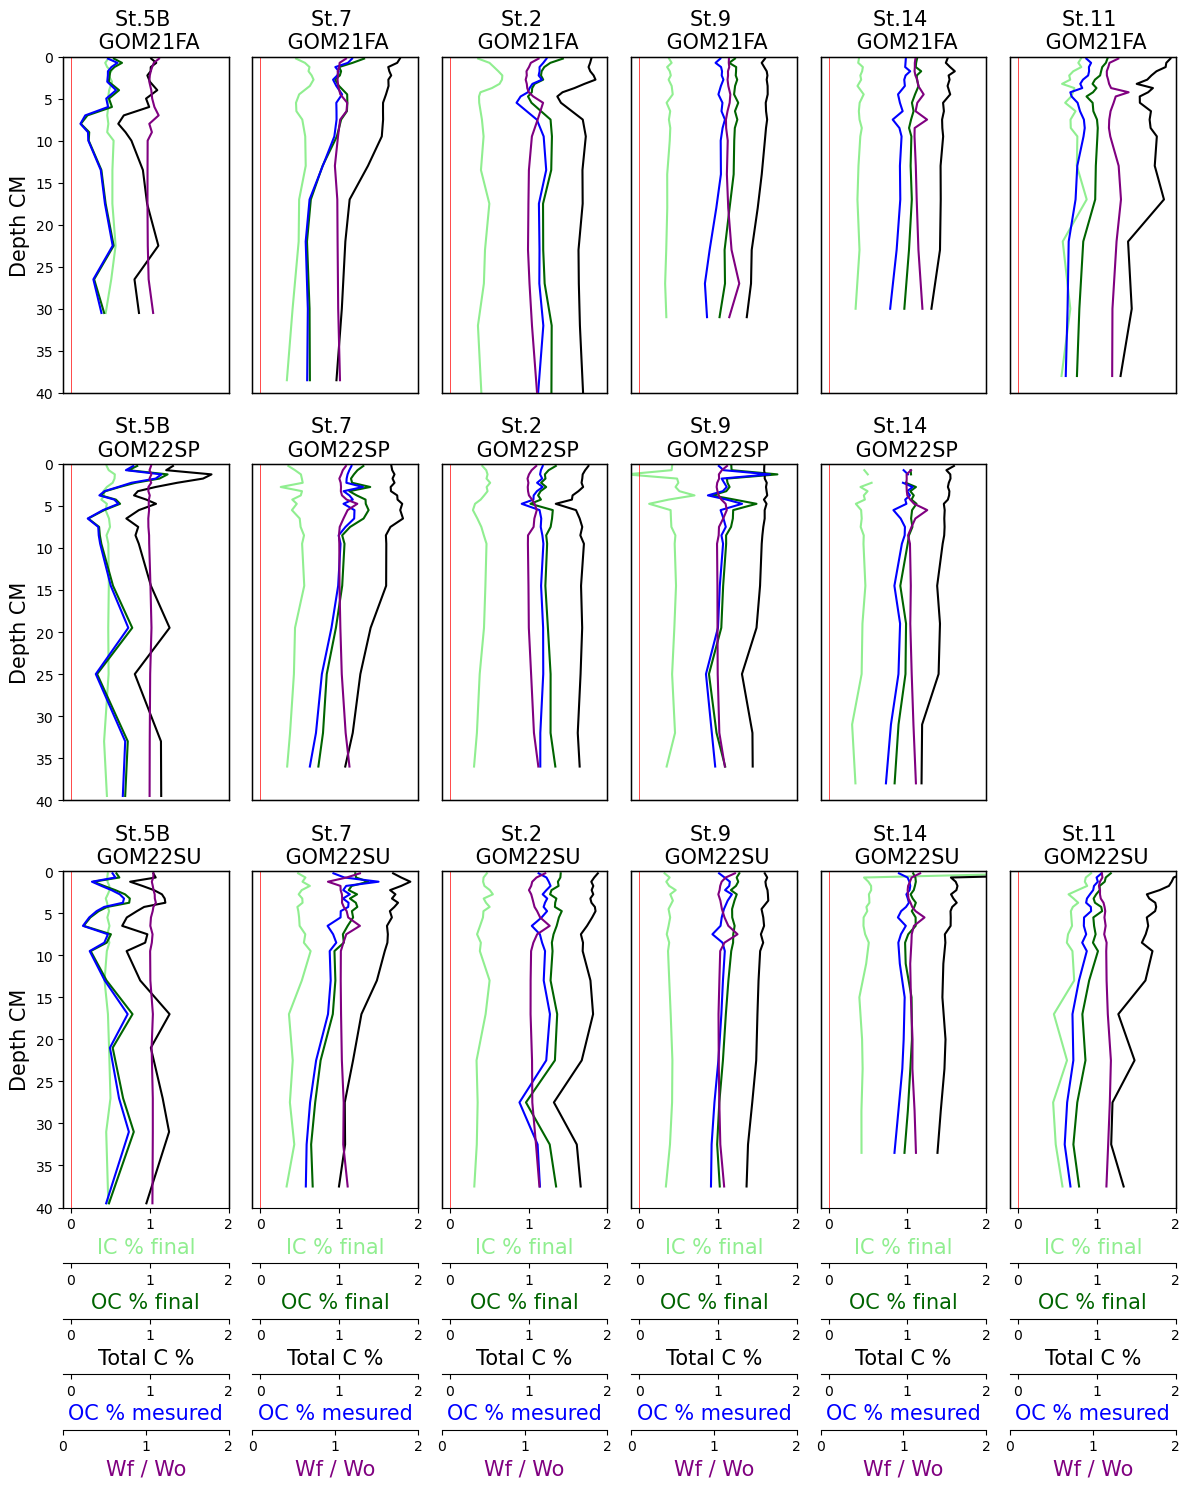

In [5]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IC%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,2)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,2)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TC%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,2)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OC%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,2)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('IC % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('OC % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total C %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('OC % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

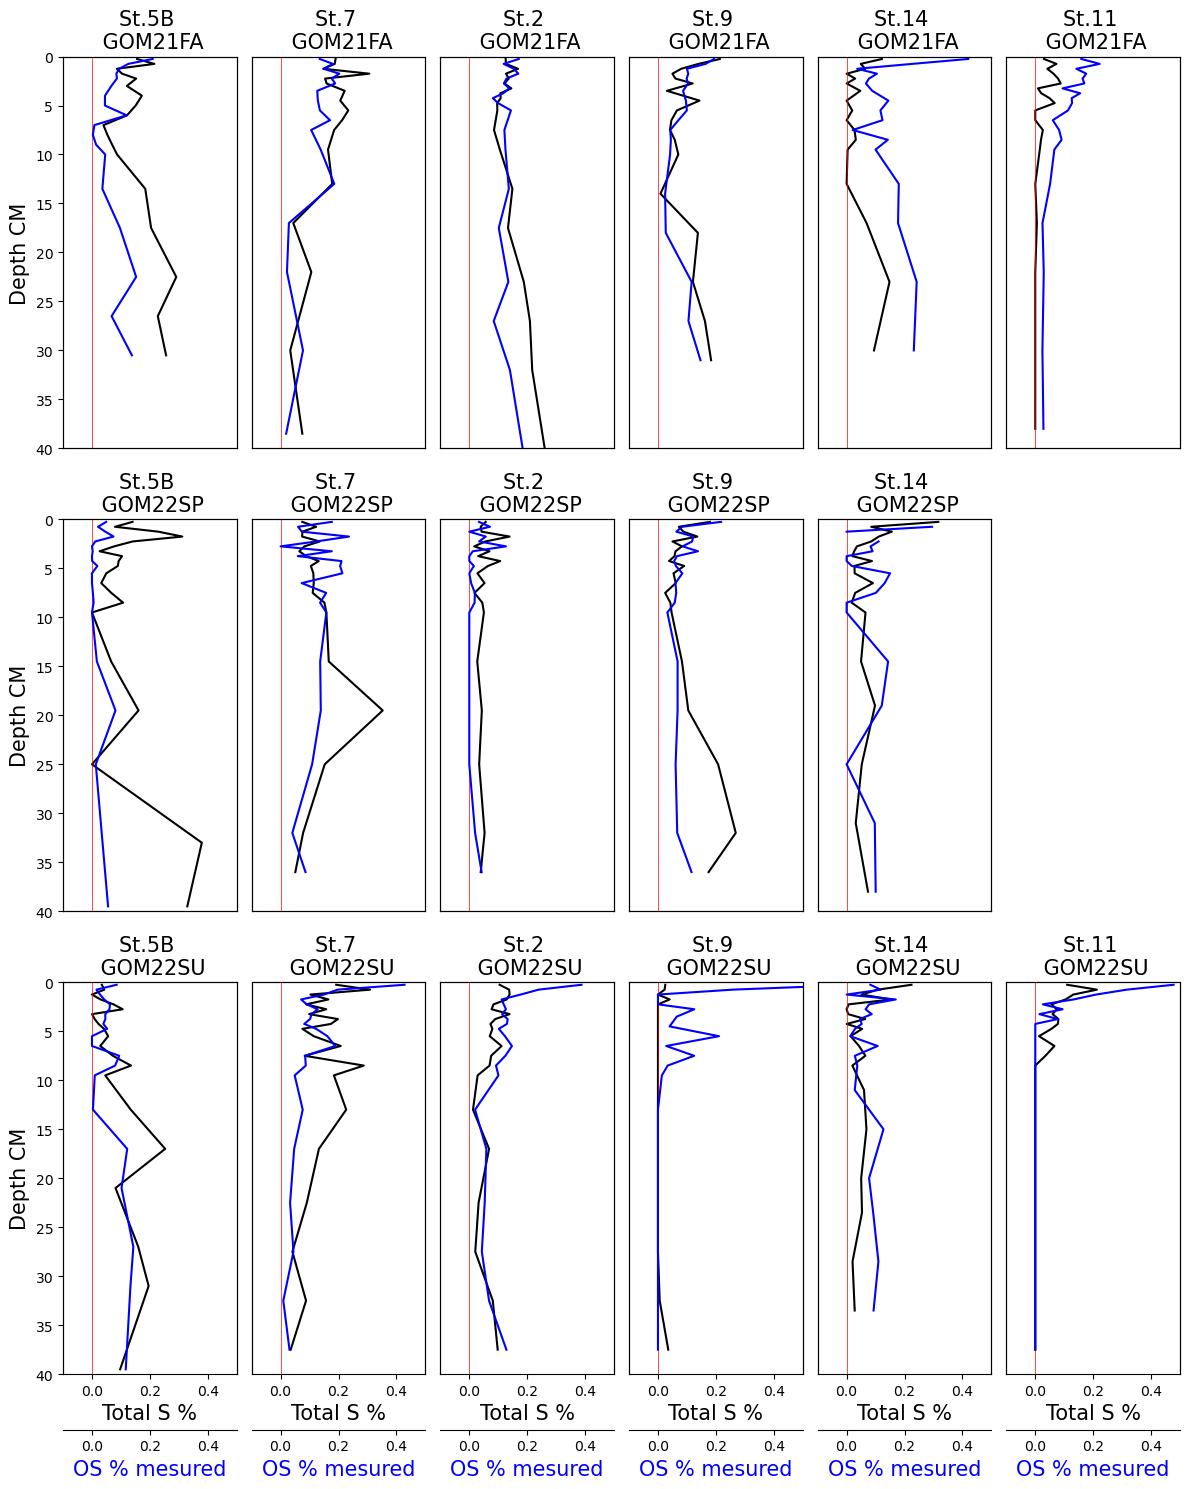

In [6]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['TS%'], sub_df['Depth_CM'], c = 'black')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,.5)
            ax.axvline(linewidth=.5, color='r')

            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OS%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,.5)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('Total S %', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax4.set_xlabel('OS % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 40))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

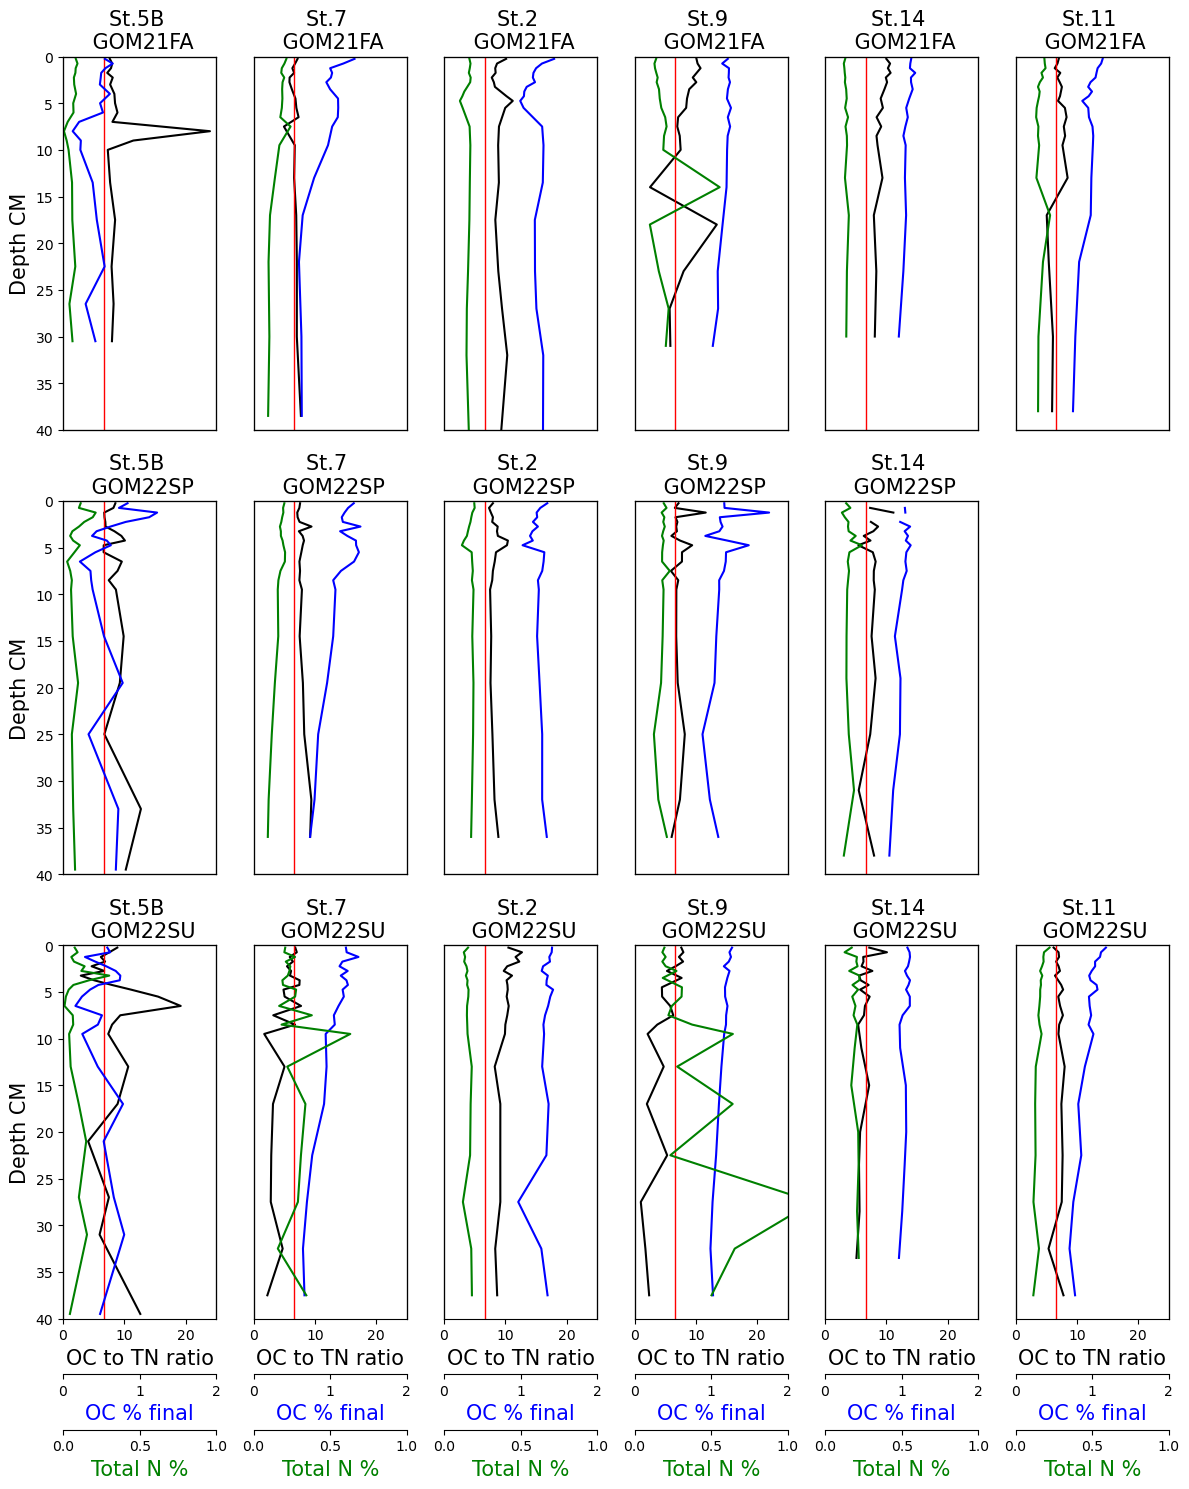

In [7]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:            
            ax = axes[i, j]
            
            ax.plot(sub_df['OC/TN'], sub_df['Depth_CM'], c = 'black')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(0,25)
            ax.axvline(x=6.6, linewidth=1, color='r')
            #ax.axvline(x=14, linewidth=.5, color='r')
                        
            ax2 = ax.twiny()
            ax2.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'blue')
            ax2.set_ylim(40,0)
            ax2.set_xlim(0,2)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TN%'], sub_df['Depth_CM'], c = 'green')
            ax3.set_ylim(40,0)
            ax3.set_xlim(0,1)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('OC to TN ratio', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('OC % final', size = 15, c= 'blue')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total N %', size = 15, c= 'green')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))

        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

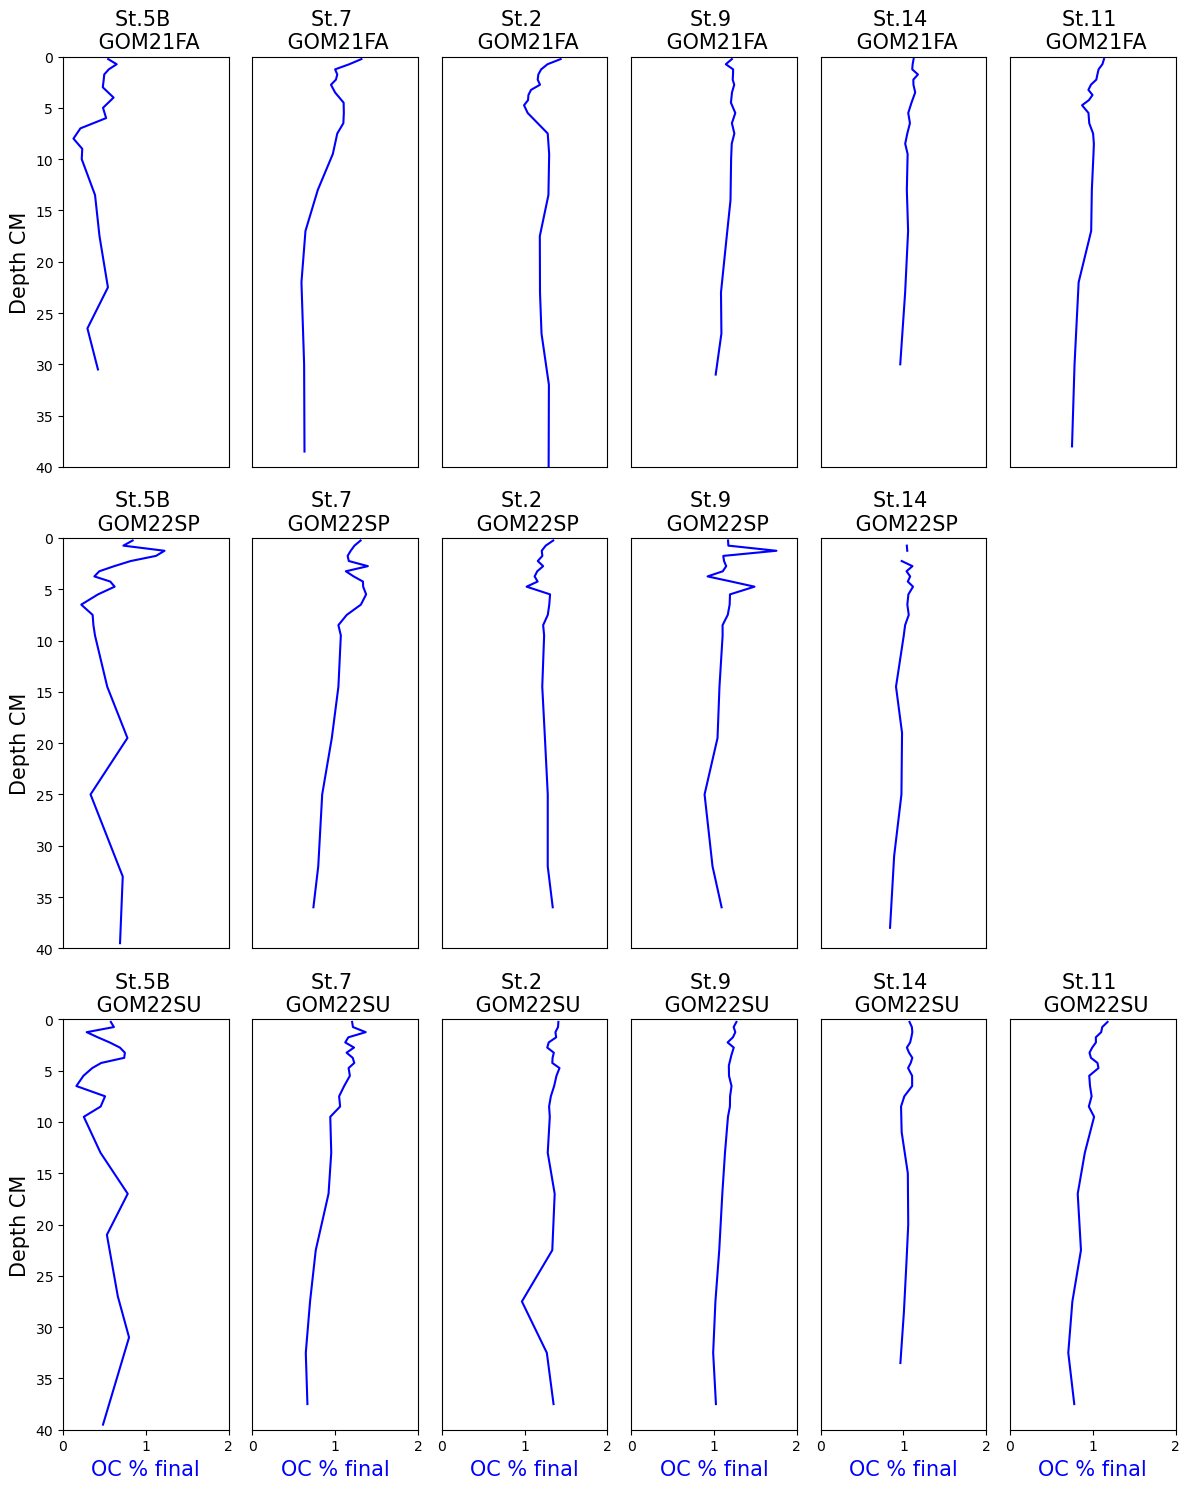

In [11]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:            
            ax = axes[i, j]
            
            ax.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'blue')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(0,2)
            ax.axvline(x=6.6, linewidth=1, color='r')
            #ax.axvline(x=14, linewidth=.5, color='r')
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('OC % final', size = 15, c= 'blue')
            ax.xaxis.set_tick_params(labelsize=10)
            

        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

In [8]:
df['C_g/cm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_g/cm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_g/cm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_g/cm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_g/cm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

df['C_g'] = df['TC%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['N_g'] = df['TN%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['S_g'] = df['TS%'] * (1-df['Porosity']) * 2.65 * df['Width']

df['OC_g'] = df['OC%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['IC_g'] = df['IC%'] * (1-df['Porosity']) * 2.65 * df['Width']



Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
            
            C_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            C_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            C_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            
            OC_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            OC_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            OC_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            
            IC_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0) & (sub['IC_g'] > 0), 'IC_g'].ravel().sum()*10000
            IC_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0 & (sub['IC_g'] > 0)), 'IC_g'].ravel().sum()*10000
            IC_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0 & (sub['IC_g'] > 0)), 'IC_g'].ravel().sum()*10000
            
            N_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            N_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            N_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            
            S_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            S_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            S_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            
            code = station + '_' + trip
            
            dic = {'code':[code],
                   'Camp':[trip],
                   'Stn':[station], 
                   'Cg_5cm_deep/M2':[C_5], 
                   'Cg_15cm_deep/M2':[C_15], 
                   'Cg_30cm_deep/M2':[C_30],
                   'OCg_5cm_deep/M2':[OC_5], 
                   'OCg_15cm_deep/M2':[OC_15], 
                   'OCg_30cm_deep/M2':[OC_30],
                   'ICg_5cm_deep/M2':[IC_5], 
                   'ICg_15cm_deep/M2':[IC_15], 
                   'ICg_30cm_deep/M2':[IC_30],
                   'Ng_5cm_deep/M2':[N_5], 
                   'Ng_15cm_deep/M2':[N_15], 
                   'Ng_30cm_deep/M2':[N_30],
                   'Sg_5cm_deep/M2':[S_5], 
                   'Sg_15cm_deep/M2':[S_15], 
                   'Sg_30cm_deep/M2':[S_30],}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
            
NCS_stocks = pd.concat(Frames, axis=0, ignore_index=False)

NCS_stocks.to_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv')

NCS_stocks

Camp    Stn  Cg_5cm_deep/M2  Cg_15cm_deep/M2  \
code                                                             
St.5B_GOM21FA  GOM21FA  St.5B    33344.913337    137273.582339   
St.7_GOM21FA   GOM21FA   St.7    32179.041367    111879.354772   
St.2_GOM21FA   GOM21FA   St.2    38847.628615    124524.055679   
St.9_GOM21FA   GOM21FA   St.9    37618.336135    150000.398017   
St.14_GOM21FA  GOM21FA  St.14    37459.890399    126353.607548   
St.11_GOM21FA  GOM21FA  St.11    25520.884300    106173.020086   
St.5B_GOM22SP  GOM22SP  St.5B    37484.818395    167967.221567   
St.7_GOM22SP   GOM22SP   St.7    28052.090511    116658.779339   
St.2_GOM22SP   GOM22SP   St.2    33487.324634    119526.526964   
St.9_GOM22SP   GOM22SP   St.9    29446.777141    133152.632510   
St.14_GOM22SP  GOM22SP  St.14    36486.836858    148616.008766   
St.5B_GOM22SU  GOM22SU  St.5B    42956.934841    136359.390697   
St.7_GOM22SU   GOM22SU   St.7    33389.043628    117964.023450   
St.2_GOM22SU   GOM22SU   St.2    34035.912966    120311.466833   
St.9_GOM22SU   GOM22SU   St.9    30918.850627    107089.376560   
St.14_GOM22SU  GOM22SU  St.14    37012.127164    110202.117637   
St.11_GOM22SU  GOM22SU  St.11    26789.216011     99911.520601   

               Cg_30cm_deep/M2  OCg_5cm_deep/M2  OCg_15cm_deep/M2  \
code                                                                
St.5B_GOM21FA    281515.010737     17594.940556      56578.567034   
St.7_GOM21FA     199273.167908     20731.404213      70993.415210   
St.2_GOM21FA     248711.507385     26796.911262      91539.150169   
St.9_GOM21FA     293223.019540     28293.942630     114241.446848   
St.14_GOM21FA    232275.969948     27453.165034      92099.314416   
St.11_GOM21FA    200808.095831     15054.601601      61707.209263   
St.5B_GOM22SP    299929.467385     22010.106298      83822.063648   
St.7_GOM22SP     204925.239251     20548.902857      80173.492401   
St.2_GOM22SP     208559.290831     24433.724073      88249.333438   
St.9_GOM22SP     261314.041358     22487.611263      96163.242211   
St.14_GOM22SP    249399.410594     22012.359527      98915.769092   
St.5B_GOM22SU    291289.961553     22427.353315      63363.080869   
St.7_GOM22SU     238175.208931     23243.654376      77594.591182   
St.2_GOM22SU     274650.859349     25366.902687      90066.027777   
St.9_GOM22SU     249609.479232     23381.064172      80947.758438   
St.14_GOM22SU    281148.572280     23291.679881      72981.073336   
St.11_GOM22SU    210020.920844     15510.400895      57960.605494   

               OCg_30cm_deep/M2  ICg_5cm_deep/M2  ICg_15cm_deep/M2  \
code                                                                 
St.5B_GOM21FA     120617.690154     15749.972780      80695.015305   
St.7_GOM21FA      119543.116470     11447.637154      40885.939563   
St.2_GOM21FA      181125.741725     12050.717353      32984.905510   
St.9_GOM21FA      223523.888705      9324.393505      35758.951169   
St.14_GOM21FA     169482.924314     10006.725364      34254.293132   
St.11_GOM21FA     114826.657624     10466.282699      44465.810823   
St.5B_GOM22SP     151241.754899     15474.712097      84145.157919   
St.7_GOM22SP      139660.045465      7503.187654      36485.286938   
St.2_GOM22SP      155691.068471      9053.600561      31277.193526   
St.9_GOM22SP      184447.956472      7223.051506      36989.390298   
St.14_GOM22SP     169207.953936      9288.505344               NaN   
St.5B_GOM22SU     151467.470177     20529.581526      72996.309828   
St.7_GOM22SU      158348.368511     10145.389251      40369.432268   
St.2_GOM22SU      207411.800114      8669.010279      30245.439055   
St.9_GOM22SU      183313.888708      7537.786454      26141.618122   
St.14_GOM22SU     194967.155907     13720.447283      37221.044301   
St.11_GOM22SU     125397.627917     11278.815116      41950.915107   

               ICg_30cm_deep/M2  Ng_5cm_deep/M2  Ng_15cm_deep/M2  \
code                                                

In [9]:
df.to_csv('../Dissertation_projects/Data/CNS/NCS_data.csv')
df

Station     Trip  Porosity  Depth_CM  Width  OC_tube  OC_Tube_Full  \
ID                                                                      
1    St.11  GOM21FA  0.926658      0.25   0.50   3.0629        3.1370   
2    St.11  GOM21FA  0.905162      0.75   0.50   3.0975        3.1984   
3    St.11  GOM21FA  0.905085      1.25   0.50   3.0679        3.1148   
4    St.11  GOM21FA  0.894661      1.75   0.50   3.0666        3.1281   
5    St.11  GOM21FA  0.890890      2.25   0.50   3.1050        3.1467   
..     ...      ...       ...       ...    ...      ...           ...   
17    St.9  GOM22SU  0.780161     17.00   4.75   3.1018        3.1677   
19    St.9  GOM22SU  0.758741     22.50   5.25   3.0784        3.1378   
20    St.9  GOM22SU  0.731244     27.50   5.00   3.0744        3.1413   
21    St.9  GOM22SU  0.706035     32.50   5.00   3.0886        3.1553   
22    St.9  GOM22SU  0.711362     37.50   2.50   3.0701        3.1705   

    OC_Tube_Post_HCL  OC_FULL  OC_POST_HCL  ...   C_g/cm3   N_g/cm3   S_g/cm3  \
ID                                          ...                                 
1             3.1598   0.0741       0.0969  ...  0.375999  0.036578  0.005868   
2             3.2188   0.1009       0.1213  ...  0.473113  0.047911  0.018414   
3             3.1236   0.0469       0.0557  ...  0.471357  0.049187  0.010482   
4             3.1385   0.0615       0.0719  ...  0.490796  0.047144  0.017563   
5             3.1538   0.0417       0.0488  ...  0.489707  0.051658  0.022786   
..               ...      ...          ...  ...       ...       ...       ...   
17            3.1713   0.0659       0.0695  ...  0.874572  0.372834  0.000000   
19            3.1412   0.0594       0.0628  ...  0.949794  0.149112  0.000000   
20            3.1456   0.0669       0.0712  ...  1.022276  0.829045  0.000000   
21            3.1604   0.0667       0.0718  ...  1.076263  0.508821  0.004695   
22            3.1828   0.1004       0.1127  ...  1.042619  0.383836  0.027248   

    IC_g/cm3  OC_g/cm3       C_g       N_g       S_g      OC_g      IC_g  
ID                                                                        
1   0.155308  0.220690  0.187999  0.018289  0.002934  0.110345  0.077654  
2   0.192615  0.280498  0.236556  0.023955  0.009207  0.140249  0.096307  
3   0.202263  0.269094  0.235679  0.024593  0.005241  0.134547  0.101132  
4   0.196136  0.294660  0.245398  0.023572  0.008781  0.147330  0.098068  
5   0.188215  0.301491  0.244853  0.025829  0.011393  0.150746  0.094108  
..       ...       ...       ...       ...       ...       ...       ...  
17  0.233459  0.641112  4.154215  1.770962  0.000000  3.045284  1.108931  
19  0.269963  0.679831  4.986417  0.782838  0.000000  3.569112  1.417305  
20  0.297832  0.724443  5.111378  4.145227  0.000000  3.622216  1.489162  
21  0.305062  0.771201  5.381313  2.544105  0.023474  3.856003  1.525310  
22  0.259856  0.782762  2.606546  0.959590  0.068121  1.956905  0.649641  

[332 rows x 32 columns]